## Подготовка

In [4]:
%matplotlib inline
import librosa
import librosa.display
import IPython
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn

In [5]:
audio_data = 'toto.mp3'
y, sr = librosa.load(audio_data)

## Анализ сигнала:

- Отрисовка сигнала в амплитудно-временной форме

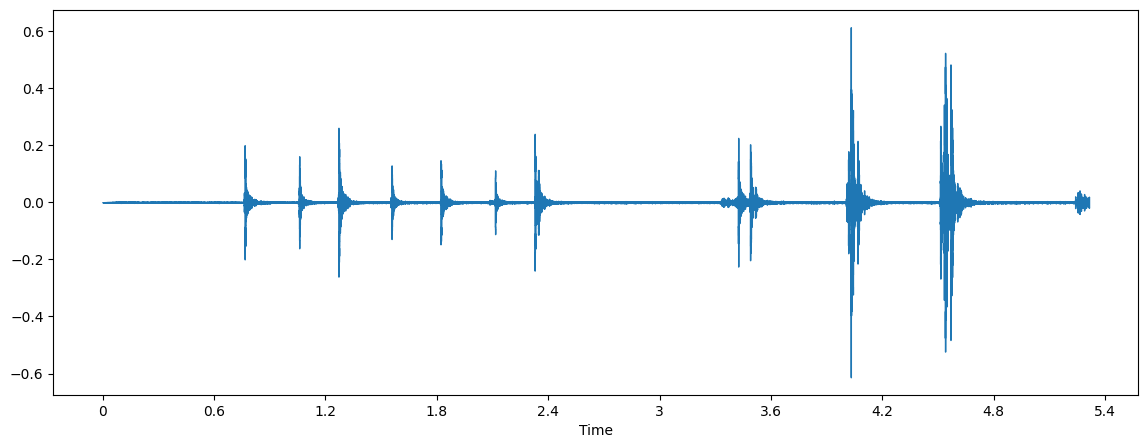

In [6]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)

- Отрисовка частотного спектра используя преобразование Фурье

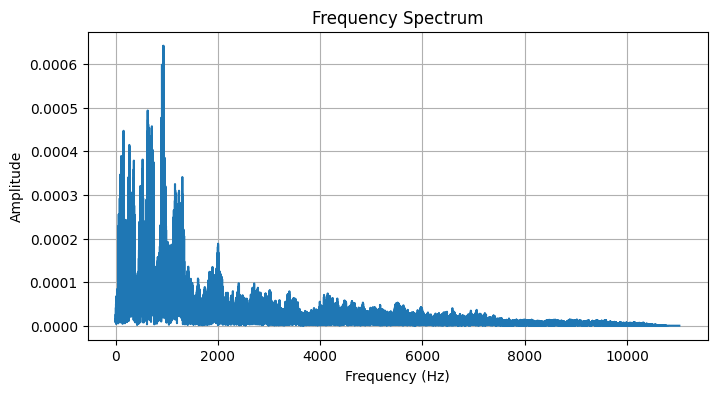

In [7]:
from scipy.fftpack import fft
spectrum = fft(y)

N = len(spectrum)
frequencies = np.fft.fftfreq(N, 1 / sr) # Частоты соответствующих бинов

plt.figure(figsize=(8, 4))
plt.plot(frequencies[:N//2], np.abs(spectrum[:N//2]) / N)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Spectrum')
plt.grid(True)
plt.show()

- Отрисовка спектрограммы сигнала

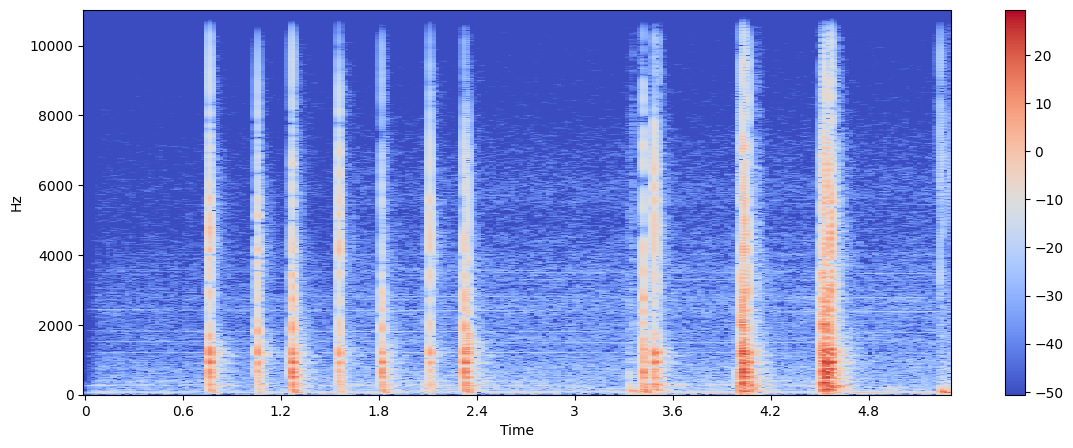

In [8]:
X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

## Выделение признаков:


In [9]:
y_harmonic, y_percussive = librosa.effects.hpss(y) # гармоническо-перкуссивная сепарация

- вывести значение темпа и количество бит (написать в чем состояла ошибка
при выведении битов в приложенном файле)


Решение ошибки: <br>
`seaborn.barplot()` ожидает данные в формате `DataFrame`, а не в виде отдельных массивов. <br>
Для решения проблемы импортируем `pandas`, а затем преобразуем наши данные в `DataFrame`. <br>


Detected Tempo: [117.45383523] beats/min
[1 2 3 4 5 6 7]


<ipython-input-10-bfe84dfff62f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x='Beats', y='Time difference (s)', data=data, palette="BuGn_d", ax=ax)


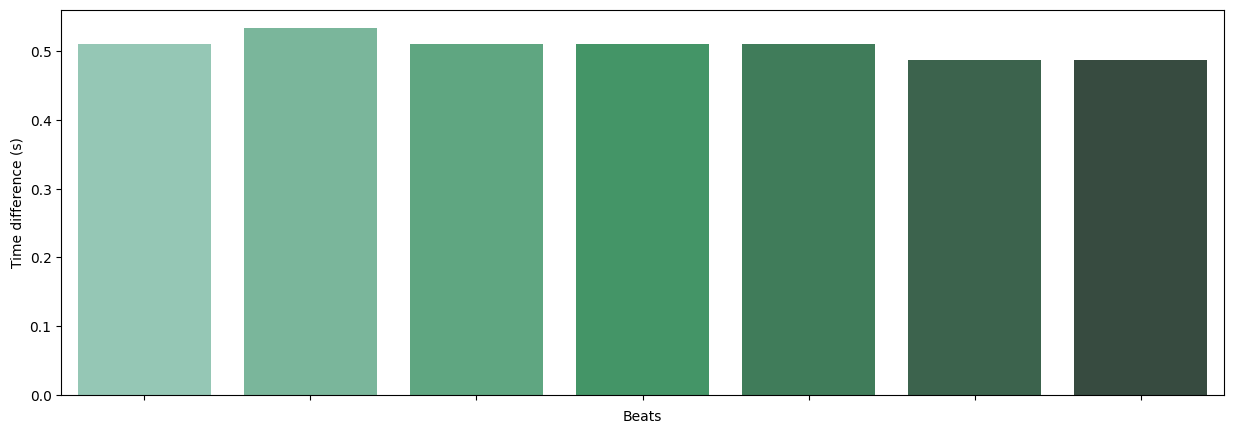

In [10]:
# Beat Extraction
tempo, beat_frames = librosa.beat.beat_track(y=y_percussive,sr=sr)
print('Detected Tempo: '+str(tempo)+ ' beats/min')
beat_times = librosa.frames_to_time(beat_frames, sr=sr)
beat_time_diff=np.ediff1d(beat_times)
beat_nums = np.arange(1, np.size(beat_times))

print(beat_nums)

data = pd.DataFrame({'Beats': beat_nums, 'Time difference (s)': beat_time_diff})

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
g = sns.barplot(x='Beats', y='Time difference (s)', data=data, palette="BuGn_d", ax=ax)
g=g.set(xticklabels=[])

- Получение и вывод в виде изображения и numpy массива мелкепстральные коэффициенты

Text(0.5, 1.0, 'MFCC')

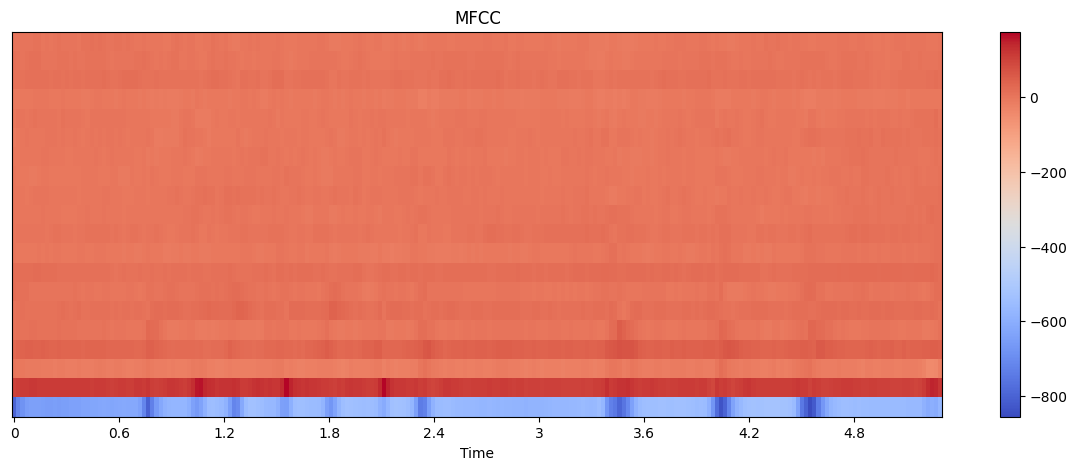

In [13]:
mfccs = librosa.feature.mfcc(y=y_harmonic, sr=sr, n_mfcc=20)
plt.figure(figsize=(15, 5))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')

- Получение и вывод изображения спектрального центроида на одном
изображении с сигналом в амплитудно-временной форме

Указывает, на какой частоте сосредоточена энергия спектра
librosa.feature.spectral_centroid вычисляет спектральный центроид для каждого фрейма в сигнале

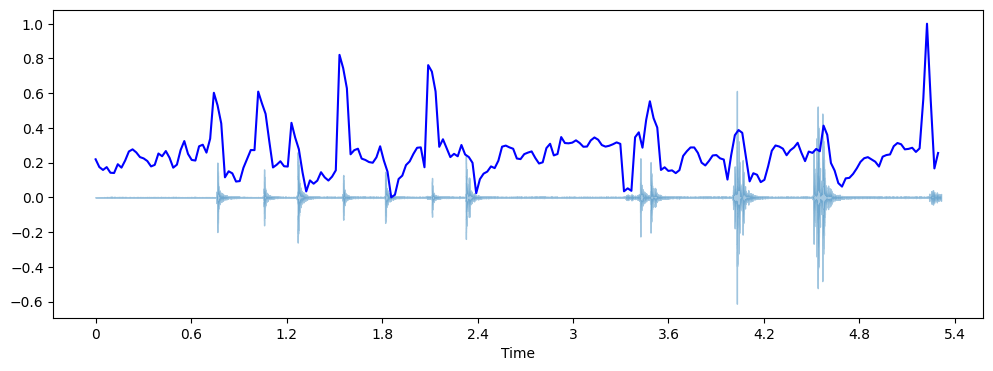

In [12]:
cent = librosa.feature.spectral_centroid(y=y, sr=sr)
spectral_centroids = cent[0]
spectral_centroids.shape

# Вычисление временной переменной для визуализации
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Нормализация спектрального центроида для визуализации
def normalize(y, axis=0):
    return sklearn.preprocessing.minmax_scale(y, axis=axis)
# Построение спектрального центроида вместе с формой волны
librosa.display.waveshow(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

## Овет на вопрос

**Гармонические звуки** характеризуются устойчивыми частотными паттернами, такими как звуки фортепиано, гитары, скрипки или голоса. Они создают периодические колебания, включающие основную частоту и её обертоны (гармоники). <br>
**Перкуссионные звуки** отличаются короткими, резкими изменениями, как у барабанов, хлопков или щелчков. Они используются для создания ритмических акцентов и ударных эффектов. <br>
Разделение гармонических и перкуссионных звуков находит применение в следующем:
+ Ритмический и тональный анализ <br>
Разделение звуков помогает определить ритм или тональные структуры, такие как аккорды (полезно для музыкального распознавания).
+ Создание минусовок и ремиксов <br>
Можно извлечь ритм из трека и создать ремикс, сохраняя только ударные звуки или, наоборот, только мелодические части.
+ Обработка звука и улучшение качества аудиозаписей <br>
В процессе реставрации старых аудиозаписей можно раздельно обрабатывать **гармонические и перкуссионные** компоненты для снижения шума или улучшения качества.
+ Музыкальные приложения и обучающие системы <br>
В музыкальных обучающих приложениях можно анализировать только гармоническую часть, чтобы обучить пользователя точному воспроизведению мелодии.
+ Анализ музыки и аранжировка <br>
Выделение ритмической основы трека позволяет добавлять новые гармонические элементы и совершенствовать аранжировку.
